CHARUDEVE KS 
(RA2011026020139)

In [1]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Data Preprocessing 
from sklearn import preprocessing

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve


from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import RidgeClassifier, SGDClassifier, LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier, RandomForestClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Ignore Warning 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the data
df = pd.read_excel("Assignment- Membership woes.xlsx")
df.head()

,MEMBERSHIP_NUMBER,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,PAYMENT_MODE,AGENT_CODE,MEMBERSHIP_STATUS,START_DATE (YYYYMMDD),END_DATE (YYYYMMDD)
0,A00001,29,113125.0,M,M,25200000.0,1.0,TYPE-B,45,2,ANNUAL,477,INFORCE,20060914,NaN
1,A00002,38,112220.0,M,M,10339200.0,1.0,TYPE-B,36,3,QUARTERLY,255,INFORCE,20061102,NaN
2,A00003,12,100000.0,M,M,14400000.0,1.0,TYPE-B,42,1,ANNUAL,7866,INFORCE,20070124,NaN
3,A00004,12,100000.0,M,M,9000000.0,1.0,TYPE-B,39,2,ANNUAL,200533,INFORCE,20070122,NaN
4,A00005,46,100000.0,M,M,4800000.0,1.0,TYPE-B,27,2,QUARTERLY,6988,INFORCE,20070131,NaN


In [3]:
# find the number of unique values in the column
df['MEMBERSHIP_TERM_YEARS'].nunique()

92

In [4]:
# find the number of unique values in the column
df['ANNUAL_FEES'].nunique()

3168

In [5]:
# finds the number of  unique values in the column
df['MEMBER_MARITAL_STATUS'].nunique()

4

In [6]:
# prints all unique values in the column
df['MEMBER_MARITAL_STATUS'].unique()

array(['M', nan, 'S', 'W', 'D'], dtype=object)

In [7]:
# creates map for encoding
mms_map = {"M": 0, "S": 1, "W": 2, "D": 3}

# Replace missing values with a placeholder (e.g., -1)
df['MEMBER_MARITAL_STATUS'] = df['MEMBER_MARITAL_STATUS'].replace(np.NaN, -1)

# Map the values using the updated dictionary
df['MEMBER_MARITAL_STATUS'] = df['MEMBER_MARITAL_STATUS'].map(mms_map)

In [8]:
# finds the number of unique value in the column
df['MEMBER_GENDER'].nunique()

2

In [9]:
# prints the unique values in the column
df['MEMBER_GENDER'].unique()

array(['M', nan, 'F'], dtype=object)

In [10]:
# creates map for encoding
gender_map = {
    'M': 0,
    'F': 1,
    np.nan: 2  # You can choose any other numerical value for NaN
}

# Map the values using the dictionary
df['MEMBER_GENDER'] = df['MEMBER_GENDER'].map(gender_map)


In [11]:
# finds the number of unique values in the column
df['MEMBER_ANNUAL_INCOME'].nunique()

798

In [12]:
# finds the number of unique values in the column
df['MEMBER_OCCUPATION_CD'].nunique()

6

In [13]:
# prints the unique values in the column
df['MEMBER_OCCUPATION_CD'].unique()

array([ 1.,  4.,  5.,  6., nan,  2.,  3.])

In [14]:
# creates map for encoding
occupation_map = {1.0: 0, 2.0: 1, 3.0: 2, 4.0: 3, 5.0: 4, 6.0: 5, np.nan: -1}

# Replace missing values with a placeholder (e.g., -1)
df['MEMBER_OCCUPATION_CD'] = df['MEMBER_OCCUPATION_CD'].replace(np.nan, -1)

# Map the values using the updated dictionary
df['MEMBER_OCCUPATION_CD'] = df['MEMBER_OCCUPATION_CD'].map(occupation_map)


In [15]:
# finds the number of unique elements in the column
df['MEMBERSHIP_PACKAGE'].nunique()

2

In [16]:
# prints unique values in the column
df['MEMBERSHIP_PACKAGE'].unique()

array(['TYPE-B', 'TYPE-A'], dtype=object)

In [17]:
# created map for encoding
package_map = {'TYPE-A': 0, 'TYPE-B': 1}

# Map the values using the dictionary
df['MEMBERSHIP_PACKAGE'] = df['MEMBERSHIP_PACKAGE'].map(package_map)


In [18]:
# finds the number of unique value in the column
df['MEMBER_AGE_AT_ISSUE'].nunique()

89

In [19]:
# finds the number of unique values in the column
df['ADDITIONAL_MEMBERS'].nunique()

4

In [20]:
# prints unique values in the column
df['ADDITIONAL_MEMBERS'].unique()

array([2, 3, 1, 0], dtype=int64)

In [21]:
# finds the number of unique values in the column
df['PAYMENT_MODE'].nunique()

5

In [22]:
# prints unique values in the column
df['PAYMENT_MODE'].unique()

array(['ANNUAL', 'QUARTERLY', 'MONTHLY', 'SEMI-ANNUAL', 'SINGLE-PREMIUM'],
      dtype=object)

In [23]:
# creates map for encoding
payment_mode_map = {
    'ANNUAL': 0,
    'QUARTERLY': 1,
    'MONTHLY': 2,
    'SEMI-ANNUAL': 3,
    'SINGLE-PREMIUM': 4
}

# Map the values using the dictionary
df['PAYMENT_MODE'] = df['PAYMENT_MODE'].map(payment_mode_map)


In [24]:
# finds the number of unique values in the column
df['AGENT_CODE'].nunique()

4317

In [25]:
# finds the number of unique values in the column
df['MEMBERSHIP_STATUS'].nunique()

2

In [26]:
#printes unique values in the column
df['MEMBERSHIP_STATUS'].unique()

array(['INFORCE', 'CANCELLED'], dtype=object)

In [27]:
# creates map for encoding
membership_status_map = {
    'INFORCE': 0,
    'CANCELLED': 1
}

# Map the values using the dictionary
df['MEMBERSHIP_STATUS'] = df['MEMBERSHIP_STATUS'].map(membership_status_map)


In [28]:
# finds the number of  unique values in the column
df['START_DATE (YYYYMMDD)'].nunique()

1300

In [29]:
# finds the number of unique values in the column
df['END_DATE  (YYYYMMDD)'].nunique()

1061

After exploring the data let's preprocess with needed column.

In [30]:
# prints the dataset (to check the changes) 
df.head()

,MEMBERSHIP_NUMBER,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,PAYMENT_MODE,AGENT_CODE,MEMBERSHIP_STATUS,START_DATE (YYYYMMDD),END_DATE (YYYYMMDD)
0,A00001,29,113125.0,0.0,0,25200000.0,0.0,1,45,2,0,477,0,20060914,NaN
1,A00002,38,112220.0,0.0,0,10339200.0,0.0,1,36,3,1,255,0,20061102,NaN
2,A00003,12,100000.0,0.0,0,14400000.0,0.0,1,42,1,0,7866,0,20070124,NaN
3,A00004,12,100000.0,0.0,0,9000000.0,0.0,1,39,2,0,200533,0,20070122,NaN
4,A00005,46,100000.0,0.0,0,4800000.0,0.0,1,27,2,1,6988,0,20070131,NaN


In [31]:
# prints the length of dataset
len(df)

10362

Let's do some inferences to explore the data

INFERENCE - 1 

The amount of inforce data is higher than cancelled data.

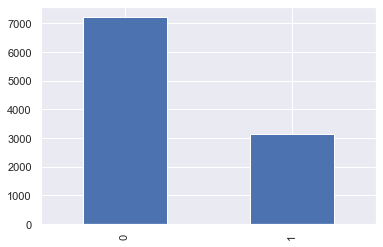

In [32]:
# plot a bar graph (x-axis - values, y-axis - freq of values)
df["MEMBERSHIP_STATUS"].value_counts().plot(kind="bar");

INFERENCE - 2

The amount of 'annualy' payment mode is high than other modes.

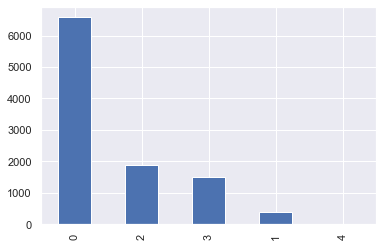

In [33]:
# plot a bar graph (x-axis - values, y-axis - freq of values)
df["PAYMENT_MODE"].value_counts().plot(kind="bar");

INFERENCE - 3

'0' Additional members is slightly high than other.

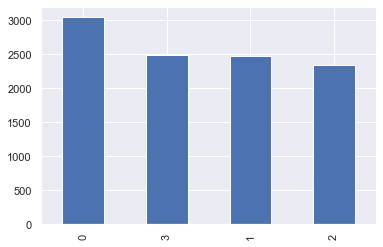

In [34]:
# plot a bar graph (x-axis - values, y-axis - freq of values)
df["ADDITIONAL_MEMBERS"].value_counts().plot(kind="bar");

INFERENCE - 4

Type A is chosen more than Type B.

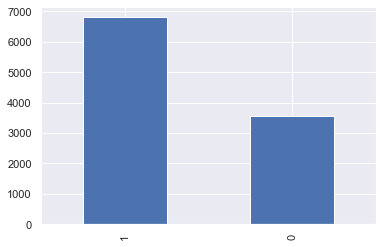

In [35]:
# plot a bar graph (x-axis - values, y-axis - freq of values)
df["MEMBERSHIP_PACKAGE"].value_counts().plot(kind="bar");

INFERENCE - 5 

'0' has the highest frequency than other values in "MEMBER_OCCUPATION_CD"

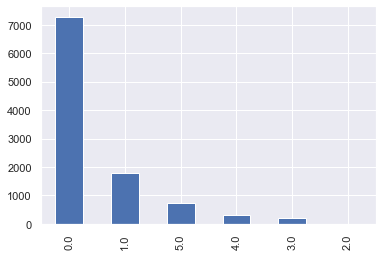

In [36]:
# plot a bar graph (x-axis - values, y-axis - freq of values)
df["MEMBER_OCCUPATION_CD"].value_counts().plot(kind="bar");

INFERENCE - 6

The dataset has highest number of married data that is type 0.

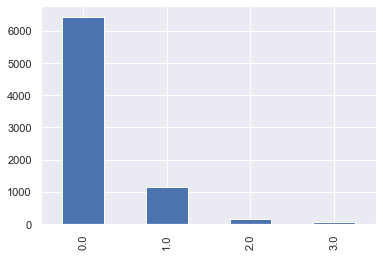

In [37]:
# plot a bar graph (x-axis - values, y-axis - freq of values)
df["MEMBER_MARITAL_STATUS"].value_counts().plot(kind="bar");

Uho! 'AGENT_CODE' is in string dtype  let's convert it to int

In [38]:
# convert AGENT_CODE to numeric (assuming it contains only numbers)
df['AGENT_CODE'] = pd.to_numeric(df['AGENT_CODE'], errors='coerce')

# if you want to convert to int (removing NaN values)
df['AGENT_CODE'] = df['AGENT_CODE'].astype('Int64')


In [39]:
# to check the dtype of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10362 entries, 0 to 10361
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MEMBERSHIP_NUMBER      10362 non-null  object 
 1   MEMBERSHIP_TERM_YEARS  10362 non-null  int64  
 2   ANNUAL_FEES            10362 non-null  float64
 3   MEMBER_MARITAL_STATUS  7765 non-null   float64
 4   MEMBER_GENDER          10362 non-null  int64  
 5   MEMBER_ANNUAL_INCOME   8608 non-null   float64
 6   MEMBER_OCCUPATION_CD   10319 non-null  float64
 7   MEMBERSHIP_PACKAGE     10362 non-null  int64  
 8   MEMBER_AGE_AT_ISSUE    10362 non-null  int64  
 9   ADDITIONAL_MEMBERS     10362 non-null  int64  
 10  PAYMENT_MODE           10362 non-null  int64  
 11  AGENT_CODE             10361 non-null  Int64  
 12  MEMBERSHIP_STATUS      10362 non-null  int64  
 13  START_DATE (YYYYMMDD)  10362 non-null  int64  
 14  END_DATE  (YYYYMMDD)   3143 non-null   float64
dtypes:

In [40]:
# checks the null values
df.isna().sum()

MEMBERSHIP_NUMBER           0
MEMBERSHIP_TERM_YEARS       0
ANNUAL_FEES                 0
MEMBER_MARITAL_STATUS    2597
MEMBER_GENDER               0
MEMBER_ANNUAL_INCOME     1754
MEMBER_OCCUPATION_CD       43
MEMBERSHIP_PACKAGE          0
MEMBER_AGE_AT_ISSUE         0
ADDITIONAL_MEMBERS          0
PAYMENT_MODE                0
AGENT_CODE                  1
MEMBERSHIP_STATUS           0
START_DATE (YYYYMMDD)       0
END_DATE  (YYYYMMDD)     7219
dtype: int64

In [41]:
# generates statistical summary
df.describe()

,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,PAYMENT_MODE,AGENT_CODE,MEMBERSHIP_STATUS,START_DATE (YYYYMMDD),END_DATE (YYYYMMDD)
count,10362.000000,1.036200e+04,7765.000000,10362.000000,8.608000e+03,10319.000000,10362.000000,10362.000000,10362.000000,10362.000000,1.036100e+04,10362.000000,1.036200e+04,3.143000e+03
mean,29.395001,1.788122e+05,0.202318,0.351573,1.451100e+06,0.711019,0.657113,46.798494,1.412276,0.836422,7.142788e+05,0.303320,2.010828e+07,2.011390e+07
std,22.427712,2.688747e+05,0.483520,0.588161,1.757174e+07,1.453960,0.474697,13.897085,1.145136,1.172578,4.355170e+05,0.459714,1.719666e+04,1.378483e+04
min,9.000000,0.000000e+00,0.000000,0.000000,9.996000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.550000e+02,0.000000,2.006091e+07,2.007083e+07
25%,12.000000,1.000000e+05,0.000000,0.000000,3.999960e+05,0.000000,0.000000,37.000000,0.000000,0.000000,3.433440e+05,0.000000,2.009123e+07,2.010122e+07
50%,19.000000,1.182093e+05,0.000000,0.000000,5.499960e+05,0.000000,1.000000,46.000000,1.000000,0.000000,6.877330e+05,0.000000,2.010123e+07,2.011113e+07
75%,37.000000,1.900000e+05,0.000000,1.000000,9.999960e+05,1.000000,1.000000,57.000000,2.000000,2.000000,1.144166e+06,1.000000,2.012123e+07,2.013012e+07
max,102.000000,1.010000e+07,3.000000,2.000000,1.000000e+09,5.000000,1.000000,92.000000,3.000000,4.000000,1.491111e+06,1.000000,2.013113e+07,2.013112e+07


Dealing NULL VALUES!

In [42]:
# fills the null values in the column
df['MEMBER_ANNUAL_INCOME'].fillna(df['MEMBER_ANNUAL_INCOME'].mean(), inplace=True)
df['MEMBER_OCCUPATION_CD'].fillna(df['MEMBER_OCCUPATION_CD'].mean(), inplace=True)


In [43]:
# fills the null values in the column
df['MEMBER_MARITAL_STATUS'].fillna(df['MEMBER_MARITAL_STATUS'].mode()[0], inplace=True)
df['MEMBER_GENDER'].fillna(df['MEMBER_GENDER'].mode()[0], inplace=True)


In [44]:
# fills the null values in the column
df['END_DATE  (YYYYMMDD)'].fillna(method='ffill', inplace=True)  # Forward fill



In [45]:
# fills the null values in the column
df['END_DATE  (YYYYMMDD)'].fillna(0, inplace=True)  # Assuming 0 is a suitable constant value


In [46]:
# checks null values
df.isna().sum()

MEMBERSHIP_NUMBER        0
MEMBERSHIP_TERM_YEARS    0
ANNUAL_FEES              0
MEMBER_MARITAL_STATUS    0
MEMBER_GENDER            0
MEMBER_ANNUAL_INCOME     0
MEMBER_OCCUPATION_CD     0
MEMBERSHIP_PACKAGE       0
MEMBER_AGE_AT_ISSUE      0
ADDITIONAL_MEMBERS       0
PAYMENT_MODE             0
AGENT_CODE               1
MEMBERSHIP_STATUS        0
START_DATE (YYYYMMDD)    0
END_DATE  (YYYYMMDD)     0
dtype: int64

In [47]:
# to check the dtype 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10362 entries, 0 to 10361
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MEMBERSHIP_NUMBER      10362 non-null  object 
 1   MEMBERSHIP_TERM_YEARS  10362 non-null  int64  
 2   ANNUAL_FEES            10362 non-null  float64
 3   MEMBER_MARITAL_STATUS  10362 non-null  float64
 4   MEMBER_GENDER          10362 non-null  int64  
 5   MEMBER_ANNUAL_INCOME   10362 non-null  float64
 6   MEMBER_OCCUPATION_CD   10362 non-null  float64
 7   MEMBERSHIP_PACKAGE     10362 non-null  int64  
 8   MEMBER_AGE_AT_ISSUE    10362 non-null  int64  
 9   ADDITIONAL_MEMBERS     10362 non-null  int64  
 10  PAYMENT_MODE           10362 non-null  int64  
 11  AGENT_CODE             10361 non-null  Int64  
 12  MEMBERSHIP_STATUS      10362 non-null  int64  
 13  START_DATE (YYYYMMDD)  10362 non-null  int64  
 14  END_DATE  (YYYYMMDD)   10362 non-null  float64
dtypes:

In [48]:
# to check the updates
df.head()

,MEMBERSHIP_NUMBER,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,PAYMENT_MODE,AGENT_CODE,MEMBERSHIP_STATUS,START_DATE (YYYYMMDD),END_DATE (YYYYMMDD)
0,A00001,29,113125.0,0.0,0,25200000.0,0.0,1,45,2,0,477,0,20060914,0.0
1,A00002,38,112220.0,0.0,0,10339200.0,0.0,1,36,3,1,255,0,20061102,0.0
2,A00003,12,100000.0,0.0,0,14400000.0,0.0,1,42,1,0,7866,0,20070124,0.0
3,A00004,12,100000.0,0.0,0,9000000.0,0.0,1,39,2,0,200533,0,20070122,0.0
4,A00005,46,100000.0,0.0,0,4800000.0,0.0,1,27,2,1,6988,0,20070131,0.0


Plotting cross tabs to compare between columns.

INFERENCE - 7 

'Annualy' payment mode with 'Inforce' membership_status has the high value in the dataset.

In [49]:
# plotting a cross tab
pd.crosstab(df["MEMBERSHIP_STATUS"], df["PAYMENT_MODE"])

PAYMENT_MODE,0,1,2,3,4
MEMBERSHIP_STATUS,,,,,
0,4692,236,1319,963,9
1,1897,154,562,530,0


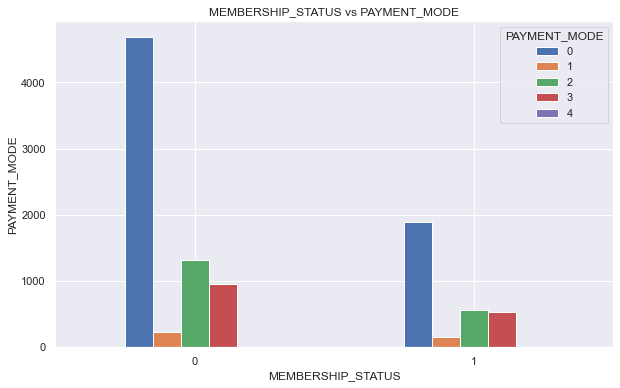

In [50]:
# plotting a cross tab
pd.crosstab(df["MEMBERSHIP_STATUS"], df["PAYMENT_MODE"]).plot(kind="bar",
                                   figsize=(10, 6))
plt.title("MEMBERSHIP_STATUS vs PAYMENT_MODE")
plt.xlabel("MEMBERSHIP_STATUS")
plt.ylabel("PAYMENT_MODE")
plt.xticks(rotation=0);

INFERENCE - 8

'0' additional members and 'Inforce' membership_status has highest value in data

In [51]:
# plotting a cross tab
pd.crosstab(df["MEMBERSHIP_STATUS"], df["ADDITIONAL_MEMBERS"])

ADDITIONAL_MEMBERS,0,1,2,3
MEMBERSHIP_STATUS,,,,
0,2106,1700,1642,1771
1,944,778,704,717


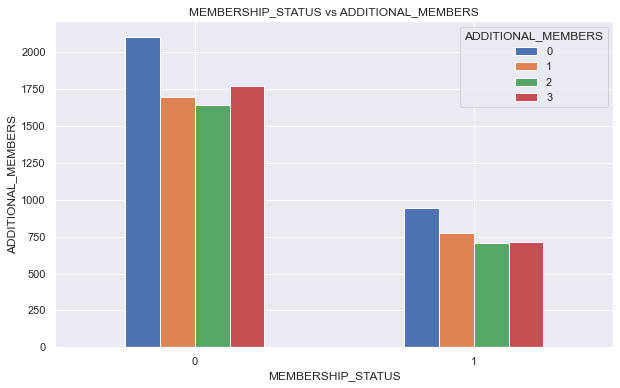

In [52]:
# plotting a cross tab
pd.crosstab(df["MEMBERSHIP_STATUS"], df["ADDITIONAL_MEMBERS"]).plot(kind="bar",
                                   figsize=(10, 6))
plt.title("MEMBERSHIP_STATUS vs ADDITIONAL_MEMBERS")
plt.xlabel("MEMBERSHIP_STATUS")
plt.ylabel("ADDITIONAL_MEMBERS")
plt.xticks(rotation=0);

INFERENCE - 9

'Type b' membership package with 'Inforce' membership status has high freq in data

In [53]:
# plotting a cross tab
pd.crosstab(df["MEMBERSHIP_STATUS"], df["MEMBERSHIP_PACKAGE"])

MEMBERSHIP_PACKAGE,0,1
MEMBERSHIP_STATUS,,
0,2962,4257
1,591,2552


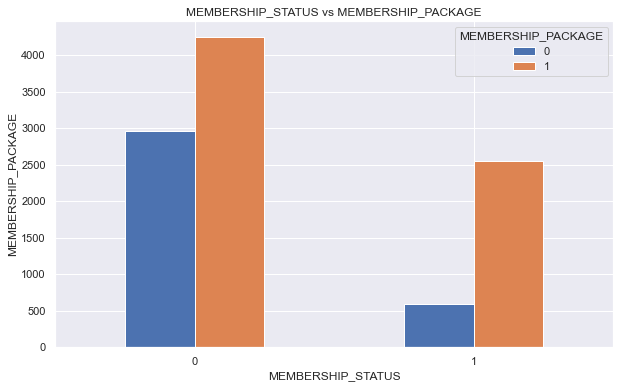

In [54]:
# plotting a cross tab
pd.crosstab(df["MEMBERSHIP_STATUS"], df["MEMBERSHIP_PACKAGE"]).plot(kind="bar",
                                   figsize=(10, 6))
plt.title("MEMBERSHIP_STATUS vs MEMBERSHIP_PACKAGE")
plt.xlabel("MEMBERSHIP_STATUS")
plt.ylabel("MEMBERSHIP_PACKAGE")
plt.xticks(rotation=0);

INFERENCE - 10

'0' member_occupation_cd with 'Inforce' membership_status has high freq in data

In [55]:
# plotting a cross tab
pd.crosstab(df["MEMBERSHIP_STATUS"], df["MEMBER_OCCUPATION_CD"])

MEMBER_OCCUPATION_CD,0.000000,0.711019,1.000000,2.000000,3.000000,4.000000,5.000000
MEMBERSHIP_STATUS,,,,,,,
0,4895,35,1336,0,153,223,577
1,2386,8,442,1,54,101,151


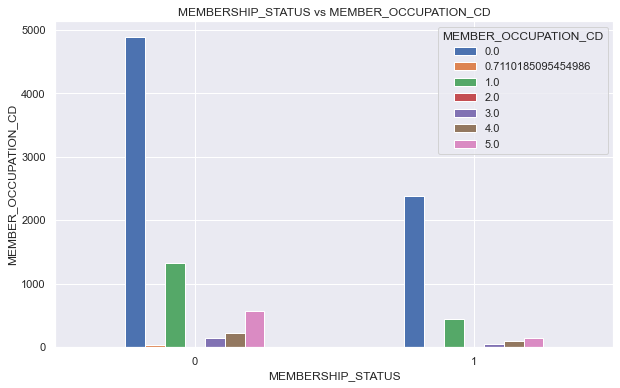

In [56]:
# plotting a cross tab
pd.crosstab(df["MEMBERSHIP_STATUS"], df["MEMBER_OCCUPATION_CD"]).plot(kind="bar",
                                   figsize=(10, 6))
plt.title("MEMBERSHIP_STATUS vs MEMBER_OCCUPATION_CD")
plt.xlabel("MEMBERSHIP_STATUS")
plt.ylabel("MEMBER_OCCUPATION_CD")
plt.xticks(rotation=0);

INFERENCE - 11

'M' member_marital_status with 'Inforce' membership_status has high freq in dataset

In [57]:
# plotting a cross tab
pd.crosstab(df["MEMBERSHIP_STATUS"], df["MEMBER_MARITAL_STATUS"])

MEMBER_MARITAL_STATUS,0.0,1.0,2.0,3.0
MEMBERSHIP_STATUS,,,,
0,6349,723,111,36
1,2678,421,35,9


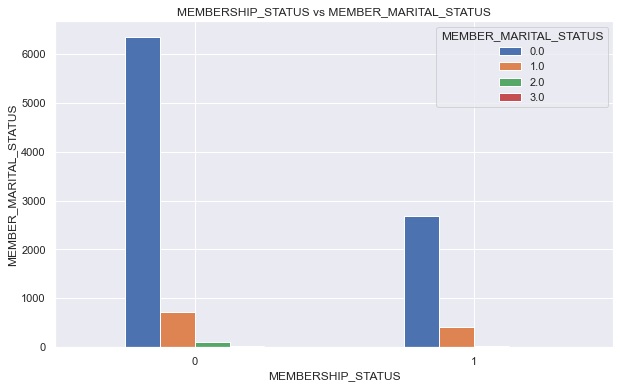

In [58]:
# plotting a cross tab
pd.crosstab(df["MEMBERSHIP_STATUS"], df["MEMBER_MARITAL_STATUS"]).plot(kind="bar",
                                   figsize=(10, 6))
plt.title("MEMBERSHIP_STATUS vs MEMBER_MARITAL_STATUS")
plt.xlabel("MEMBERSHIP_STATUS")
plt.ylabel("MEMBER_MARITAL_STATUS")
plt.xticks(rotation=0);

In [59]:
# plotting a cross tab
pd.crosstab(df["PAYMENT_MODE"], df["ADDITIONAL_MEMBERS"])

ADDITIONAL_MEMBERS,0,1,2,3
PAYMENT_MODE,,,,
0,2050,1518,1447,1574
1,79,126,90,95
2,517,463,466,435
3,403,369,341,380
4,1,2,2,4


In [60]:
# plotting a cross tab
pd.crosstab(df["PAYMENT_MODE"], df["MEMBERSHIP_PACKAGE"])

MEMBERSHIP_PACKAGE,0,1
PAYMENT_MODE,,
0,2123,4466
1,113,277
2,902,979
3,415,1078
4,0,9


In [61]:
# plotting a cross tab
pd.crosstab(df["PAYMENT_MODE"], df["MEMBER_OCCUPATION_CD"])

MEMBER_OCCUPATION_CD,0.000000,0.711019,1.000000,2.000000,3.000000,4.000000,5.000000
PAYMENT_MODE,,,,,,,
0,4544,32,1204,0,120,219,470
1,301,0,32,0,13,11,33
2,1341,2,353,1,39,40,105
3,1087,9,189,0,35,54,119
4,8,0,0,0,0,0,1


In [62]:
# plotting a cross tab
pd.crosstab(df["PAYMENT_MODE"], df["MEMBER_MARITAL_STATUS"])

MEMBER_MARITAL_STATUS,0.0,1.0,2.0,3.0
PAYMENT_MODE,,,,
0,5802,664,95,28
1,333,54,3,0
2,1584,258,26,13
3,1300,167,22,4
4,8,1,0,0


In [63]:
# plotting a cross tab
pd.crosstab(df["ADDITIONAL_MEMBERS"], df["MEMBERSHIP_PACKAGE"])

MEMBERSHIP_PACKAGE,0,1
ADDITIONAL_MEMBERS,,
0,1379,1671
1,730,1748
2,689,1657
3,755,1733


In [64]:
# plotting a cross tab
pd.crosstab(df["ADDITIONAL_MEMBERS"], df["MEMBER_OCCUPATION_CD"])

MEMBER_OCCUPATION_CD,0.000000,0.711019,1.000000,2.000000,3.000000,4.000000,5.000000
ADDITIONAL_MEMBERS,,,,,,,
0,2043,18,629,0,32,65,263
1,1777,5,384,1,75,83,153
2,1683,9,378,0,58,83,135
3,1778,11,387,0,42,93,177


In [65]:
# plotting a cross tab
pd.crosstab(df["ADDITIONAL_MEMBERS"], df["MEMBER_MARITAL_STATUS"])

MEMBER_MARITAL_STATUS,0.0,1.0,2.0,3.0
ADDITIONAL_MEMBERS,,,,
0,1715,1144,146,45
1,2478,0,0,0
2,2346,0,0,0
3,2488,0,0,0


In [66]:
# plotting a cross tab
pd.crosstab(df["MEMBERSHIP_PACKAGE"], df["MEMBER_OCCUPATION_CD"])

MEMBER_OCCUPATION_CD,0.000000,0.711019,1.000000,2.000000,3.000000,4.000000,5.000000
MEMBERSHIP_PACKAGE,,,,,,,
0,1892,20,1121,1,48,56,415
1,5389,23,657,0,159,268,313


In [67]:
# plotting a cross tab
pd.crosstab(df["MEMBERSHIP_PACKAGE"], df["MEMBER_MARITAL_STATUS"])

MEMBER_MARITAL_STATUS,0.0,1.0,2.0,3.0
MEMBERSHIP_PACKAGE,,,,
0,3232,262,37,22
1,5795,882,109,23


In [68]:
# plotting a cross tab
pd.crosstab(df["MEMBER_OCCUPATION_CD"], df["MEMBER_MARITAL_STATUS"])

MEMBER_MARITAL_STATUS,0.0,1.0,2.0,3.0
MEMBER_OCCUPATION_CD,,,,
0.000000,6229,925,93,34
0.711019,40,1,2,0
1.000000,1603,144,22,9
2.000000,1,0,0,0
3.000000,194,6,7,0
4.000000,272,48,2,2
5.000000,688,20,20,0


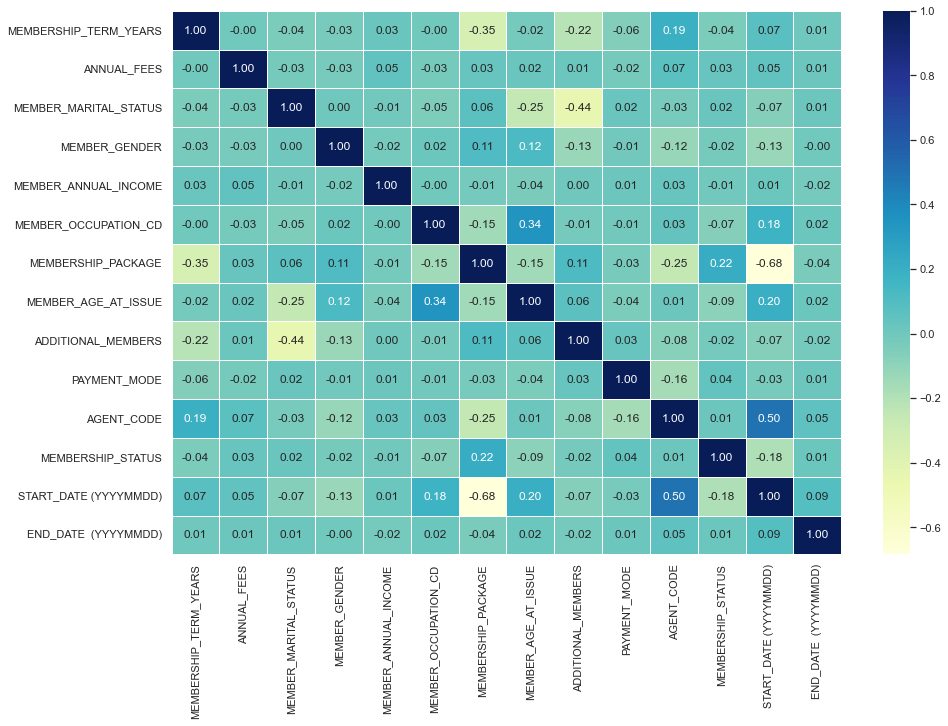

In [69]:
# plots a heatmap visualizing the correlation matrix of numerical columns in the data
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix, 
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

In [70]:
# prints the names of the column
print(df.columns)



Index(['MEMBERSHIP_NUMBER', 'MEMBERSHIP_TERM_YEARS', 'ANNUAL_FEES',
       'MEMBER_MARITAL_STATUS', 'MEMBER_GENDER', 'MEMBER_ANNUAL_INCOME',
       'MEMBER_OCCUPATION_CD', 'MEMBERSHIP_PACKAGE', 'MEMBER_AGE_AT_ISSUE',
       'ADDITIONAL_MEMBERS', 'PAYMENT_MODE', 'AGENT_CODE', 'MEMBERSHIP_STATUS',
       'START_DATE (YYYYMMDD)', 'END_DATE  (YYYYMMDD)'],
      dtype='object')


In [71]:
# creating categorial_columns
categorical_columns = ['MEMBER_MARITAL_STATUS', 'MEMBER_GENDER', 'MEMBER_OCCUPATION_CD', 'MEMBERSHIP_PACKAGE', 'PAYMENT_MODE', 'AGENT_CODE', 'MEMBERSHIP_STATUS']


In [72]:
# checking datatypes
df.dtypes

MEMBERSHIP_NUMBER         object
MEMBERSHIP_TERM_YEARS      int64
ANNUAL_FEES              float64
MEMBER_MARITAL_STATUS    float64
MEMBER_GENDER              int64
MEMBER_ANNUAL_INCOME     float64
MEMBER_OCCUPATION_CD     float64
MEMBERSHIP_PACKAGE         int64
MEMBER_AGE_AT_ISSUE        int64
ADDITIONAL_MEMBERS         int64
PAYMENT_MODE               int64
AGENT_CODE                 Int64
MEMBERSHIP_STATUS          int64
START_DATE (YYYYMMDD)      int64
END_DATE  (YYYYMMDD)     float64
dtype: object

In [73]:
# converts only numeric columns to float
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_columns] = df[numeric_columns].astype(float)


In [74]:
# checks null values
df.isnull().sum()

MEMBERSHIP_NUMBER        0
MEMBERSHIP_TERM_YEARS    0
ANNUAL_FEES              0
MEMBER_MARITAL_STATUS    0
MEMBER_GENDER            0
MEMBER_ANNUAL_INCOME     0
MEMBER_OCCUPATION_CD     0
MEMBERSHIP_PACKAGE       0
MEMBER_AGE_AT_ISSUE      0
ADDITIONAL_MEMBERS       0
PAYMENT_MODE             0
AGENT_CODE               1
MEMBERSHIP_STATUS        0
START_DATE (YYYYMMDD)    0
END_DATE  (YYYYMMDD)     0
dtype: int64

In [75]:
# declaring classes
classes = ["Inforce", "Cancelled"]

Let's drop unwanted columns which reduces accuracy of model

In [76]:
# remove leading or trailing whitespaces in column names
df.columns = df.columns.str.strip()

# drop columns
df.drop(['AGENT_CODE', 'MEMBERSHIP_NUMBER','MEMBER_OCCUPATION_CD'], axis=1, inplace=True)


Dataset is ready to train & test!

In [77]:
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(df.drop("MEMBERSHIP_STATUS", axis = 1),
                                                    df["MEMBERSHIP_STATUS"],
                                                    test_size=0.1)

Let's try modelling using below models

Ridge Classifier

SGD Classifier

Support Vector Machine

Decision Trees

Gradient Boost

Hist Gradient Boost

Random Forest

Catboost

LGBM Classifier- High accuracy

XGB Classifier

Logistic Regression

Ridge Classifier

In [78]:
# ridge model
ridge_model = RidgeClassifier()
ridge_model.fit(X_train, y_train)


RidgeClassifier()

In [79]:
# classification report 
y_pred = ridge_model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.70      1.00      0.82       724
         1.0       0.40      0.01      0.01       313

    accuracy                           0.70      1037
   macro avg       0.55      0.50      0.42      1037
weighted avg       0.61      0.70      0.58      1037



In [80]:
# accuracy
accuracy_score(y_test, y_pred)

0.6972034715525555

In [81]:
# confusion matrix
array = confusion_matrix(y_test, y_pred)
array 

array([[721,   3],
       [311,   2]], dtype=int64)

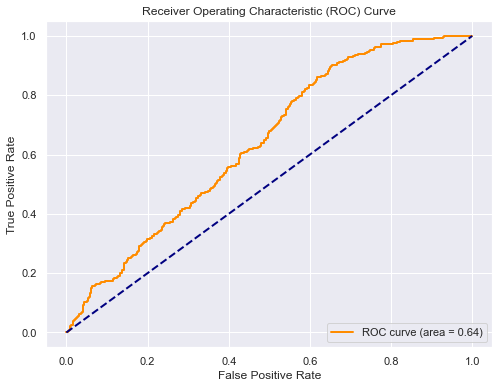

In [82]:
# auc value and roc curve
y_scores = ridge_model.decision_function(X_test)

# compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

SGD Classifier


In [83]:
# sgdclassifier model
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)

SGDClassifier()

In [84]:
# classification report
y_pred = sgd_model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.70      1.00      0.82       724
         1.0       1.00      0.00      0.01       313

    accuracy                           0.70      1037
   macro avg       0.85      0.50      0.41      1037
weighted avg       0.79      0.70      0.58      1037



In [85]:
# accuracy
accuracy_score(y_test, y_pred)

0.6991321118611379

In [86]:
# confusion matrix
array = confusion_matrix(y_test, y_pred)
array

array([[724,   0],
       [312,   1]], dtype=int64)

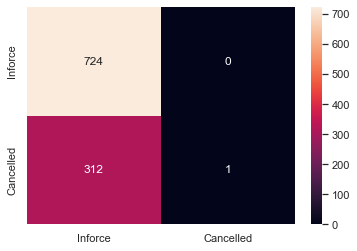

In [87]:
# heat map
df_cm = pd.DataFrame(array, index = [i for i in classes],
                  columns = [i for i in classes])
plt.figure()
sns.heatmap(df_cm, annot=True, fmt = ".0f");

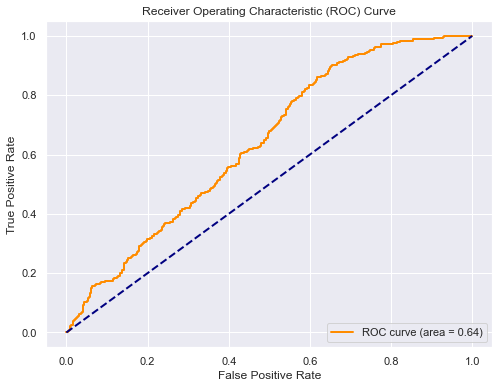

In [88]:
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Support Vector Machine

In [89]:
# svm model
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

LinearSVC()

In [90]:
# classification report
y_pred = svm_model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.70      1.00      0.82       724
         1.0       0.00      0.00      0.00       313

    accuracy                           0.70      1037
   macro avg       0.35      0.50      0.41      1037
weighted avg       0.49      0.70      0.57      1037



In [91]:
# accuracy
accuracy_score(y_test, y_pred)

0.6981677917068466

In [92]:
# confusion matrix
array = confusion_matrix(y_test, y_pred)
array

array([[724,   0],
       [313,   0]], dtype=int64)

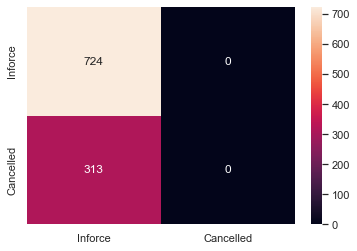

In [93]:
# heatmap
df_cm = pd.DataFrame(array, index = [i for i in classes],
                  columns = [i for i in classes])
plt.figure()
sns.heatmap(df_cm, annot=True, fmt = ".0f");

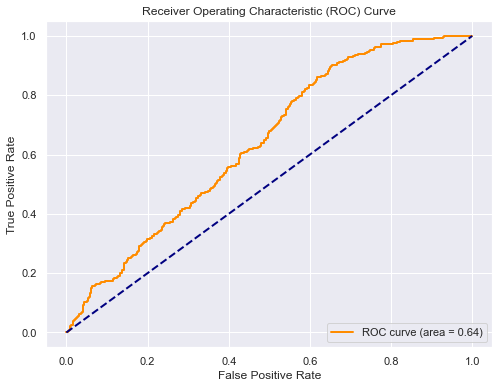

In [94]:
# auc value and roc curve
# compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Decision Trees


In [95]:
# decision tree classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [96]:
# classification report
y_pred = dt_model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.81      0.80      0.81       724
         1.0       0.55      0.57      0.56       313

    accuracy                           0.73      1037
   macro avg       0.68      0.68      0.68      1037
weighted avg       0.73      0.73      0.73      1037



In [97]:
# accuracy
accuracy_score(y_test, y_pred)

0.7309546769527483

In [98]:
# confusion matrix
array = confusion_matrix(y_test, y_pred)
array 

array([[581, 143],
       [136, 177]], dtype=int64)

<AxesSubplot:>

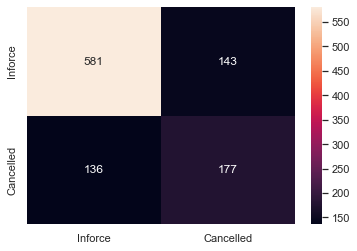

In [99]:
# heatmap
df_cm = pd.DataFrame(array, index = [i for i in classes],
                  columns = [i for i in classes])
plt.figure()
sns.heatmap(df_cm, annot=True, fmt = ".0f")

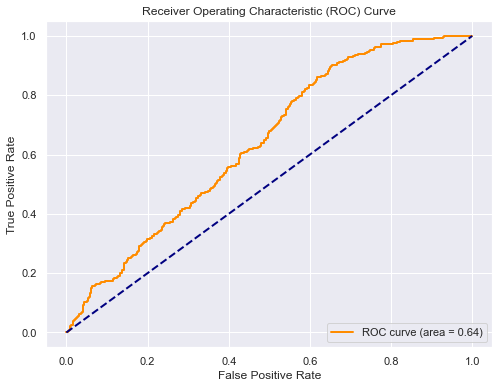

In [100]:
# compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Gradient Boost


In [101]:
# gradient boosting classifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [102]:
# classification report
y_pred = gb_model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.76      0.92      0.83       724
         1.0       0.64      0.35      0.45       313

    accuracy                           0.75      1037
   macro avg       0.70      0.63      0.64      1037
weighted avg       0.73      0.75      0.72      1037



In [103]:
#accuracy
accuracy_score(y_test, y_pred)

0.7454194792671167

In [104]:
# confusion matrix
array = confusion_matrix(y_test, y_pred)
array

array([[664,  60],
       [204, 109]], dtype=int64)

<AxesSubplot:>

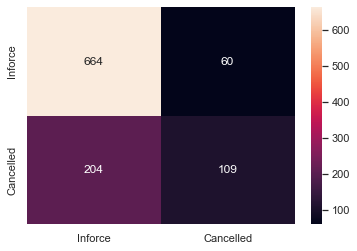

In [105]:
# heatmap
df_cm = pd.DataFrame(array, index = [i for i in classes],
                  columns = [i for i in classes])
plt.figure()
sns.heatmap(df_cm, annot=True, fmt = ".0f")

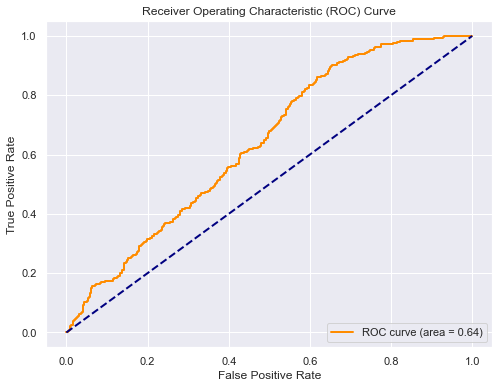

In [106]:
# compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Hist Gradient Boost


In [107]:
# histgradientboosting classifier
hgb_model = HistGradientBoostingClassifier()
hgb_model.fit(X_train, y_train)

HistGradientBoostingClassifier()

In [108]:
# classification report
y_pred = hgb_model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.81      0.89      0.85       724
         1.0       0.67      0.51      0.58       313

    accuracy                           0.78      1037
   macro avg       0.74      0.70      0.71      1037
weighted avg       0.77      0.78      0.77      1037



In [109]:
# accuracy 
accuracy_score(y_test, y_pred)

0.7772420443587271

In [110]:
# confusion matrix
array = confusion_matrix(y_test, y_pred)
array 

array([[646,  78],
       [153, 160]], dtype=int64)

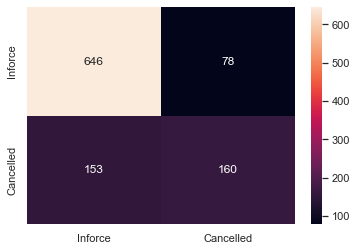

In [111]:
# heatmap
df_cm = pd.DataFrame(array, index = [i for i in classes],
                  columns = [i for i in classes])
plt.figure()
sns.heatmap(df_cm, annot=True, fmt = ".0f");

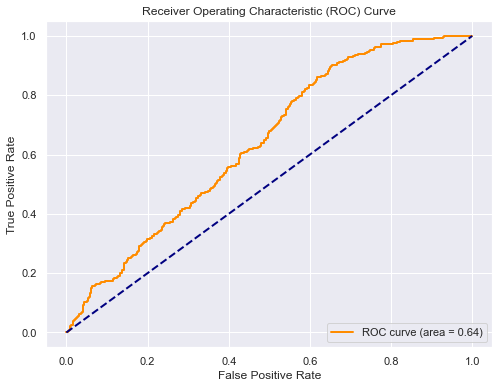

In [112]:
# compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Random Forest


In [113]:
# random forest classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [114]:
# classification report
y_pred = rf_model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.81      0.90      0.85       724
         1.0       0.69      0.50      0.58       313

    accuracy                           0.78      1037
   macro avg       0.75      0.70      0.72      1037
weighted avg       0.77      0.78      0.77      1037



In [115]:
# accuracy 
accuracy_score(y_test, y_pred)

0.781099324975892

In [116]:
# confusion matrix
array = confusion_matrix(y_test, y_pred)
array

array([[653,  71],
       [156, 157]], dtype=int64)

<AxesSubplot:>

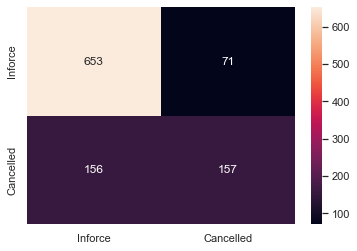

In [117]:
# heatmap
df_cm = pd.DataFrame(array, index = [i for i in classes],
                  columns = [i for i in classes])
plt.figure()
sns.heatmap(df_cm, annot=True, fmt = ".0f")

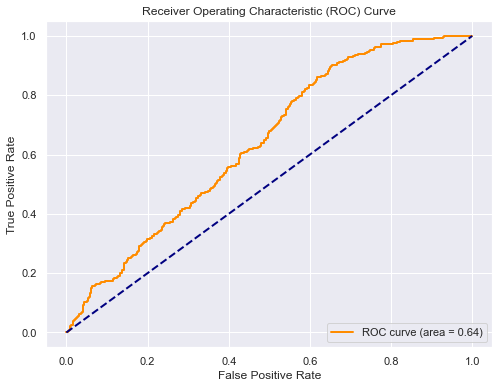

In [118]:
# compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Catboost


In [119]:
# catboost model
catboost_model = CatBoostClassifier()
catboost_model.fit(X_train, y_train)

Learning rate set to 0.026728
0:	learn: 0.6818467	total: 176ms	remaining: 2m 55s
1:	learn: 0.6668343	total: 189ms	remaining: 1m 34s
2:	learn: 0.6506269	total: 201ms	remaining: 1m 6s
3:	learn: 0.6420988	total: 214ms	remaining: 53.2s
4:	learn: 0.6312409	total: 225ms	remaining: 44.8s
5:	learn: 0.6225319	total: 236ms	remaining: 39.2s
6:	learn: 0.6153546	total: 248ms	remaining: 35.2s
7:	learn: 0.6090759	total: 259ms	remaining: 32.1s
8:	learn: 0.5989556	total: 271ms	remaining: 29.8s
9:	learn: 0.5930280	total: 282ms	remaining: 27.9s
10:	learn: 0.5873795	total: 293ms	remaining: 26.3s
11:	learn: 0.5820941	total: 304ms	remaining: 25.1s
12:	learn: 0.5771585	total: 316ms	remaining: 24s
13:	learn: 0.5700871	total: 328ms	remaining: 23.1s
14:	learn: 0.5644326	total: 339ms	remaining: 22.3s
15:	learn: 0.5611633	total: 350ms	remaining: 21.5s
16:	learn: 0.5579514	total: 362ms	remaining: 20.9s
17:	learn: 0.5547194	total: 373ms	remaining: 20.4s
18:	learn: 0.5510738	total: 387ms	remaining: 20s
19:	learn: 0.

In [120]:
# accuracy
accuracy_score(y_test, y_pred)

0.781099324975892

In [121]:
# classification report 
y_pred = catboost_model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.81      0.91      0.86       724
         1.0       0.71      0.52      0.60       313

    accuracy                           0.79      1037
   macro avg       0.76      0.71      0.73      1037
weighted avg       0.78      0.79      0.78      1037



In [122]:
# confusion matrix
array = confusion_matrix(y_test, y_pred)
array

array([[656,  68],
       [150, 163]], dtype=int64)

<AxesSubplot:>

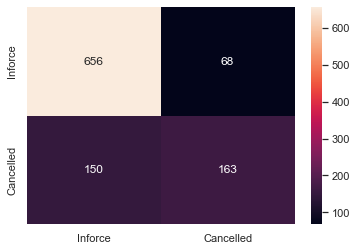

In [123]:
# heatmap
df_cm = pd.DataFrame(array, index = [i for i in classes],
                  columns = [i for i in classes])
plt.figure()
sns.heatmap(df_cm, annot=True, fmt = ".0f")

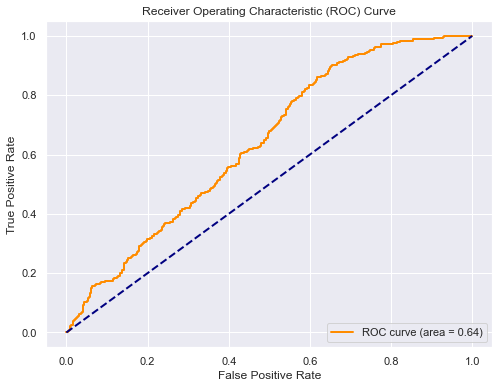

In [124]:
# compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


LGBM Classifier



In [125]:
# lgbmclassifier
lgbm_model = LGBMClassifier()
lgbm_model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2830, number of negative: 6495
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001511 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1204
[LightGBM] [Info] Number of data points in the train set: 9325, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.303485 -> initscore=-0.830756
[LightGBM] [Info] Start training from score -0.830756


LGBMClassifier()

In [126]:
# classification report
y_pred = lgbm_model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.81      0.90      0.85       724
         1.0       0.69      0.50      0.58       313

    accuracy                           0.78      1037
   macro avg       0.75      0.70      0.72      1037
weighted avg       0.77      0.78      0.77      1037



In [127]:
# accuracy 
accuracy_score(y_test, y_pred)

0.7830279652844745

In [128]:
# confusion matrix
array = confusion_matrix(y_test, y_pred)
array

array([[654,  70],
       [155, 158]], dtype=int64)

<AxesSubplot:>

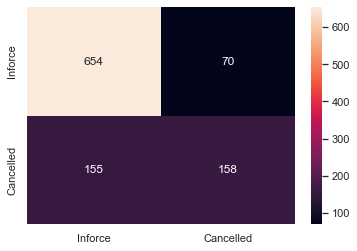

In [129]:
# heatmap
df_cm = pd.DataFrame(array, index = [i for i in classes],
                  columns = [i for i in classes])
plt.figure()
sns.heatmap(df_cm, annot=True, fmt = ".0f")

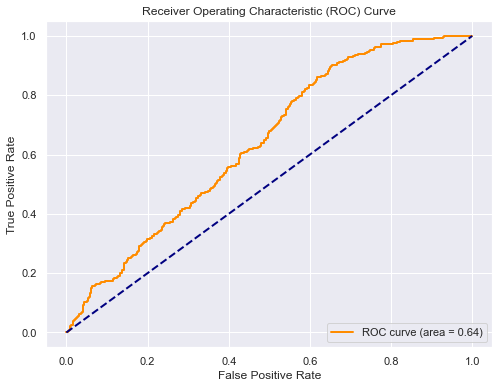

In [130]:
# compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


XGB Classifier 

In [131]:
# xgbclassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [132]:
# classification report
y_pred = xgb_model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.81      0.86      0.84       724
         1.0       0.63      0.54      0.58       313

    accuracy                           0.77      1037
   macro avg       0.72      0.70      0.71      1037
weighted avg       0.76      0.77      0.76      1037



In [133]:
# accuracy
accuracy_score(y_test, y_pred)

0.7666345226615237

In [134]:
# confusion matrix
array = confusion_matrix(y_test, y_pred)
array

array([[625,  99],
       [143, 170]], dtype=int64)

<AxesSubplot:>

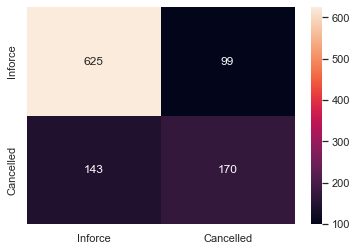

In [135]:
# heat map
df_cm = pd.DataFrame(array, index = [i for i in classes],
                  columns = [i for i in classes])
plt.figure()
sns.heatmap(df_cm, annot=True, fmt = ".0f")

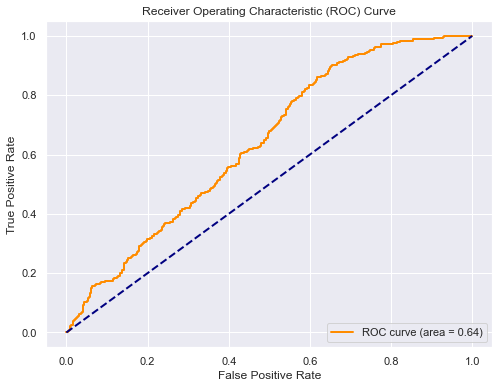

In [136]:
# compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Logistic Regression

In [137]:
# logistic regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [138]:
# classification report
y_pred = lr_model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.70      0.98      0.82       724
         1.0       0.45      0.05      0.09       313

    accuracy                           0.70      1037
   macro avg       0.58      0.51      0.45      1037
weighted avg       0.63      0.70      0.60      1037



In [139]:
#accuracy
accuracy_score(y_test, y_pred)

0.695274831243973

In [140]:
# confusion matrix
array = confusion_matrix(y_test, y_pred)
array 

array([[706,  18],
       [298,  15]], dtype=int64)

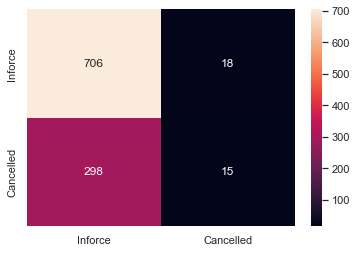

In [141]:
# heatmap
df_cm = pd.DataFrame(array, index = [i for i in classes],
                  columns = [i for i in classes])
plt.figure()
sns.heatmap(df_cm, annot=True, fmt = ".0f");

LGBM had high accuracy compared to other models for the given dataset

Result

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2830, number of negative: 6495
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000872 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1204
[LightGBM] [Info] Number of data points in the train set: 9325, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.303485 -> initscore=-0.830756
[LightGBM] [Info] Start training from score -0.830756
              precision    recall  f1-score   support

         0.0       0.81      0.90      0.85       724
         1.0       0.69      0.50      0.58       313

    accuracy                           0.78      1037
   macro avg       0.75      0.70      0.72      1037
weighted avg       0.77      0.78      0.77      1037



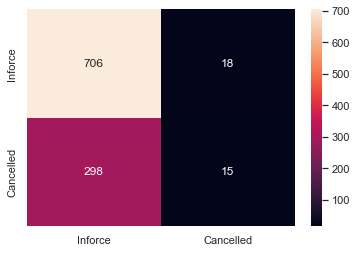

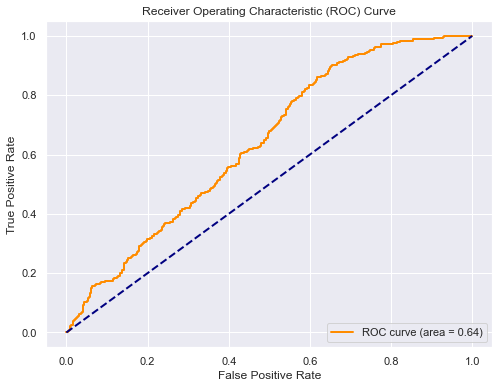

In [142]:
# lgbmclassifier
lgbm_model = LGBMClassifier()
lgbm_model.fit(X_train, y_train)

# classification report
y_pred = lgbm_model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

# accuracy 
accuracy_score(y_test, y_pred)

# heatmap
df_cm = pd.DataFrame(array, index = [i for i in classes],
                  columns = [i for i in classes])
plt.figure()
sns.heatmap(df_cm, annot=True, fmt = ".0f")

# confusion matrix
array = confusion_matrix(y_test, y_pred)
array

# compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Model is created successfully with the accuracy of 0.78 using LGBMCLASSIFIER()

'MEMBERSHIP_STATUS','PAYMENT_MODE','ADDITIONAL_MEMBERS','MEMBERSHIP_PACKAGE','MEMBER_MARITAL_STATUS' are the columns used in the model for classification. 